# Modules

* Importing the numpy as np helps user to work with arrays and work in  domain of linear algebra.
* Importing matplot helps us to plot the graph. 
* Random returns a random floating number between 0 & 1.
* Importing pandas as pd helps in data processing. 
* Dataframe helps in keeping all the data in table form. 




In [1]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame

# Different Module Of Tensorflow

* Importing tensorflow allows developer to create dataflow graphs-structures that describes how data moves through a graph or a series of processing nodes. 
* A sequential model helps you to create models layer by layer for most problem. Input takes the data for different layers. 
* Dense layer is asimple layer of neurons in which each neuron recieves input from all the neurons of previous layer. 
* BatchNormalization layer allows us to set each parameters independently.
* Dropout layer importing helps in stting input units to 0 with a frequency of rate at each step during training time.
* Importing metrics is used to judge the performance of our model. 
* SGD stands for Stochastic Gradient Descent whic is an optimization algorithm often used to find the best fit between predicted and actual outputs.
* Importing plot_model plot will create a plot of a network.



In [2]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

#  Different Module For Scikit-learn (sklearn)

* StandardScaler removes the mean and scales each features/variable to unit variance.
* ROC_curve used to show the diagnostic ability of binary classifiers.
* AUC is a measure of the ability of a classifier to distinguish between classes.
* train_test_split is used to split our data into train and tests.
* ExtraTreesClassifier is used to improve the predictive accuracy and control over-fitting.

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
## training and test datasets

#data_train = pd.read_csv('/home/kanhaiya/neural_network_biology/train_ann_term.csv')
#data_test = pd.read_csv('/home/kanhaiya/neural_network_biology/test_ann_term.csv')
data_train = pd.read_csv('../data/train_ann_term.csv') # data for train
data_test = pd.read_csv('../data/test_ann_term.csv') # data for test

In [5]:
print(data_train)

       class  lepton_pT  lepton_eta  lepton_phi  missing_energy_magnitude  \
0          1   0.907542    0.329147    0.359412                  1.497970   
1          1   0.798835    1.470639   -1.635975                  0.453773   
2          0   1.344385   -0.876626    0.935913                  1.992050   
3          0   1.595839   -0.607811    0.007075                  1.818450   
4          1   0.409391   -1.884684   -1.027292                  1.672452   
...      ...        ...         ...         ...                       ...   
68631      0   0.631747   -1.732745    0.734498                  0.647226   
68632      0   0.967752   -0.317568   -1.579379                  0.512029   
68633      1   0.908091   -0.825006   -0.830871                  0.736298   
68634      0   0.903699    0.261943   -0.429149                  1.892855   
68635      0   0.566047   -0.317568    0.062561                  0.358186   

       missing_energy_phi    jet1pt   jet1eta   jet1phi  jet1b.tag  ...  \


In [6]:
feature_names = data_train.columns[1:-1]  # we skip the first and last column

In [7]:
# initialize the model parameters

variables = data_train.columns[1:-1]  # we skip the first and last column
target_training = None
discriminator_history = None
sample_training = None
sample_validation = None

# Neural Network Hyperparameters

* Seed in python is used to initialize the random number generator or simply to generate a random number. 
* Discriminator is a model with a one-dimensional input and a one-dimensional output.
* Layer is a data-processing module that takes as input one or more tensors and that outputs one or more tensors. 
* Epochs indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
* Dropout is used to prevent a model from overfitting.
* Fraction is used to provides support for rational number arithmetic.
* Batch size refers to the number of training examples utilized in one iteration.
* Optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate.
*  SGD stands for Stochastic Gradient Descent which is an optimization algorithm often used to find the best fit between predicted and actual outputs.    




In [8]:
seed = 193 #generates a random number
discriminator_nodes =  16 # 20
discriminator_layers = 1
discriminator_epochs = 40
validation_fraction = 0.4
discriminator_dropout =  0.4
        
batchSize = 128 # 512
discriminator_optimizer = SGD(lr =0.01)
discriminator_history_array = []

# Reading Of Data

* neural network input dimension help us to know number of inputs; dimension means simply shape .Here we have a easy dat abut if we have a image then it will show the 28*28
* weight train and weight test helps to know number of weight, using len helps no number of weights and random generates the number between 0 and 1.
* target validation and target training shows the output in column as form but if we do target_training.ravel() then it will change vertical into hoorizontal.
* sample validation and training show the input escaping the first and last column.simply we can say that decreasing 2 column(data_train.columns[1:-1]) for this type of input for train.

In [9]:
neural_network_input_dimension = variables.shape


weight_train = np.reshape([random.random()/10 for i in range(len(data_train))], (len(data_train), 1))
weight_test = np.reshape([random.random()/10 for i in range(len(data_test))], (len(data_test), 1))
target_training = data_train["class"]
target_validation = data_test["class"]
sample_training = data_train[feature_names]
sample_validation = data_test[feature_names]


In [10]:
# Scaling the sample data 
scaler = StandardScaler()
sample_training_scaled = scaler.fit_transform(sample_training)# here sample_training is data_train which is passed above and named as sample_training and now it is scalled with a named as sample_training scaled.
sample_validation_scaled = scaler.fit_transform(sample_validation) # sample_validation is data_test which is passed above and named as sample_validation_ and now it is scaled with a new name sample_validation_scaled.

# Making the table of the data using DataFrame

sample_training_scaled = DataFrame(sample_training_scaled)  # sample_training_scaled is filtted in table and down line is also doing same.
sample_validation_scaled = DataFrame(sample_validation_scaled)
sample_validation_scaled = DataFrame(sample_validation_scaled)

        # Renaming the name of the columns after scaling 
sample_training_scaled.columns = sample_training.columns # here sample_training_scaled will be passed down with new name as sample_training
sample_validation_scaled.columns = sample_validation.columns # sample_validation_scaled will be passed with new name as sample_validation.
        
# Including the target training and validation output by adding one more column

sample_training_scaled['target_training'] = target_training
sample_validation_scaled['target_validation'] = target_validation
        
#print(sample_training_scaled)  # to see the data

In [11]:
# Create the model 

network_input = Input( shape = (neural_network_input_dimension))
neural_network_layer = Dense(discriminator_nodes, activation = "elu", name="HiddenLayer")(network_input)
neural_network_layer = Dense(1, activation = "sigmoid")(neural_network_layer)
        
model = Model(inputs=network_input, outputs= neural_network_layer)
model.summary()
plot_model(model, to_file='neural_network_graph.pdf')

2022-08-24 06:12:04.987377: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-24 06:12:04.987696: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-24 06:12:04.989738: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 16)                464       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile_model

model.compile(loss = "binary_crossentropy", weighted_metrics = [metrics.binary_accuracy], optimizer = "adam", metrics=['accuracy'])

In [ ]:
# fit_model

discriminator_history = model.fit(sample_training, target_training.ravel(), epochs=discriminator_epochs, batch_size = batchSize, sample_weight = weight_train.ravel(), validation_data = (sample_validation, target_validation, weight_test.ravel()))
discriminator_history_array.append(discriminator_history)

Epoch 1/40
537/537 [==============================] - 7s 13ms/step - loss: 0.0304 - accuracy: 0.6753 - binary_accuracy: 0.6748 - val_loss: 0.0304 - val_accuracy: 0.6649 - val_binary_accuracy: 0.6638
Epoch 2/40
537/537 [==============================] - 3s 6ms/step - loss: 0.0304 - accuracy: 0.6762 - binary_accuracy: 0.6754 - val_loss: 0.0304 - val_accuracy: 0.6741 - val_binary_accuracy: 0.6726
Epoch 3/40
537/537 [==============================] - 3s 6ms/step - loss: 0.0303 - accuracy: 0.6740 - binary_accuracy: 0.6735 - val_loss: 0.0303 - val_accuracy: 0.6717 - val_binary_accuracy: 0.6703
Epoch 4/40
537/537 [==============================] - 3s 5ms/step - loss: 0.0303 - accuracy: 0.6760 - binary_accuracy: 0.6756 - val_loss: 0.0304 - val_accuracy: 0.6734 - val_binary_accuracy: 0.6721
Epoch 5/40
537/537 [==============================] - 3s 6ms/step - loss: 0.0303 - accuracy: 0.6761 - binary_accuracy: 0.6757 - val_loss: 0.0306 - val_accuracy: 0.6705 - val_binary_accuracy: 0.6696
Epoch 6/4

In [ ]:
# predict_model

model_prediction = model.predict(sample_validation).ravel() # it is a prediction of test data 
model_val_prediction = model.predict(sample_training).ravel() # it is a prediction of train data 


fpr, tpr, threshold = roc_curve(target_validation, model_prediction)  # plotting the roc curve for test data.
fpr_2, tpr_2, threshold_2 = roc_curve(target_training, model_val_prediction)  # plotting the roc curve for train data.
auc_1 = auc(fpr, tpr) # plotting the auc curve for test data.
auc_2 = auc(fpr_2, tpr_2) # plotting the auc curve for train data.

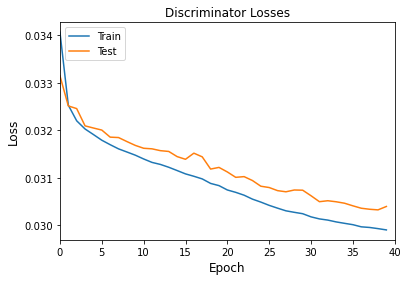

In [20]:
# plotLosses

plt.plot(discriminator_history.history['loss'])
plt.plot(discriminator_history.history['val_loss'])
plt.title('Discriminator Losses',fontsize='large')
plt.ylabel('Loss',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.xlim(0,discriminator_epochs)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('losses.pdf')

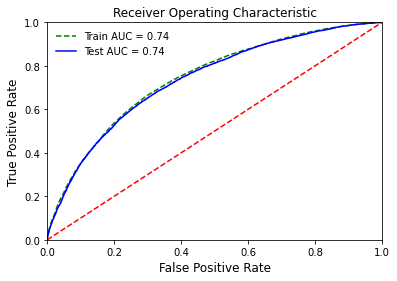

In [21]:
# plotRoc

plt.title('Receiver Operating Characteristic',fontsize='large')
plt.plot(fpr_2, tpr_2, 'g--', label='Train AUC = %0.2f'% auc_2)
plt.plot(fpr, tpr, 'b', label='Test AUC = %0.2f'% auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.,1.])
plt.ylim([-0.,1.])
plt.ylabel('True Positive Rate', fontsize='large')
plt.xlabel('False Positive Rate', fontsize='large')
plt.legend(frameon=False)
plt.savefig('roc.pdf')

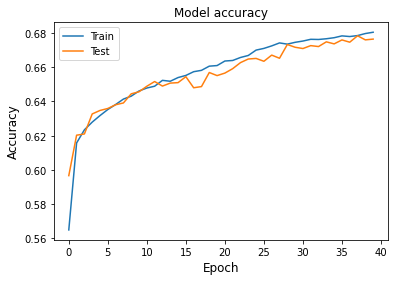

In [22]:
# plotAccuracy

plt.plot(discriminator_history.history['accuracy'])
plt.plot(discriminator_history.history['val_accuracy'])
plt.title('Model accuracy',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.pdf')

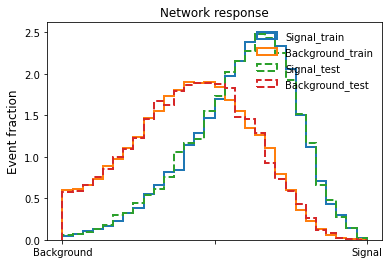

<Figure size 432x288 with 0 Axes>

In [23]:
# plotSeparation

signal_histo_test = []
background_histo_test = []
signal_histo_train = []
background_histo_train = []
for i in range(len(sample_validation)):
    if target_validation[i] == 1:
        signal_histo_test.append(model_prediction[i])
    if target_validation[i] == 0:
        background_histo_test.append(model_prediction[i])
for i in range(len(sample_training)):
    if target_training[i] == 1:
        signal_histo_train.append(model_val_prediction[i])
    if target_training[i] == 0:
        background_histo_train.append(model_val_prediction[i])
        
plt.hist(signal_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Signal_train")
plt.hist(background_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Background_train")
plt.hist(signal_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed',  label = "Signal_test")
plt.hist(background_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed', label = "Background_test")
        
plt.legend()
plt.title('Network response',fontsize='large')
plt.xticks([0.0,0.5,1.0],["Background","","Signal"],rotation=0)
# plt.xlabel('Network response', horizontalalignment='left', fontsize='large')
plt.ylabel('Event fraction', fontsize='large')
plt.legend(frameon=False)
plt.show()
plt.savefig('separation_discriminator.pdf')